<a href="https://colab.research.google.com/github/gonzaluna/challenge1_DS_AL/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head(15)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175


#1. Análisis de facturación



In [ ]:
# Ingreso Total por Tienda

tiendas = [tienda1, tienda2, tienda3, tienda4]

for i, tiendas_df in enumerate(tiendas, start=1):
    Ingreso_Total = tiendas_df['Precio'].sum()
    print(f"\nTienda {i}:\n\n \tIngreso Total: ${Ingreso_Total:,.2f}")




Tienda 1:

 	Ingreso Total: $1,150,880,400.00

Tienda 2:

 	Ingreso Total: $1,116,343,500.00

Tienda 3:

 	Ingreso Total: $1,098,019,600.00

Tienda 4:

 	Ingreso Total: $1,038,375,700.00


# 2. Ventas por categoría


 VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - TIENDA 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


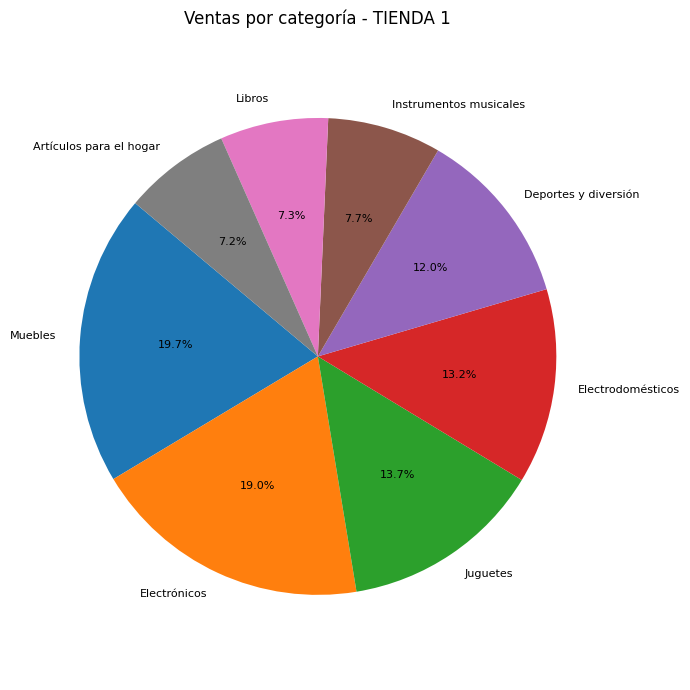


 VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - TIENDA 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


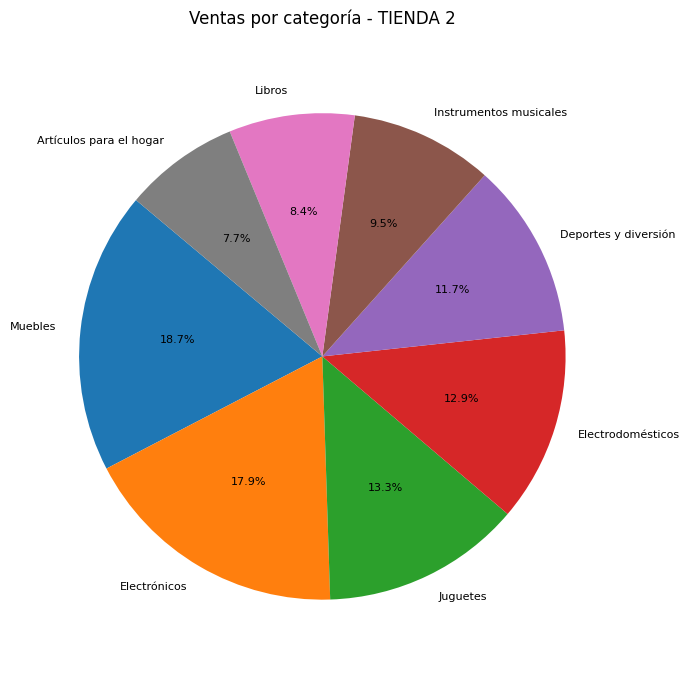


 VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - TIENDA 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64


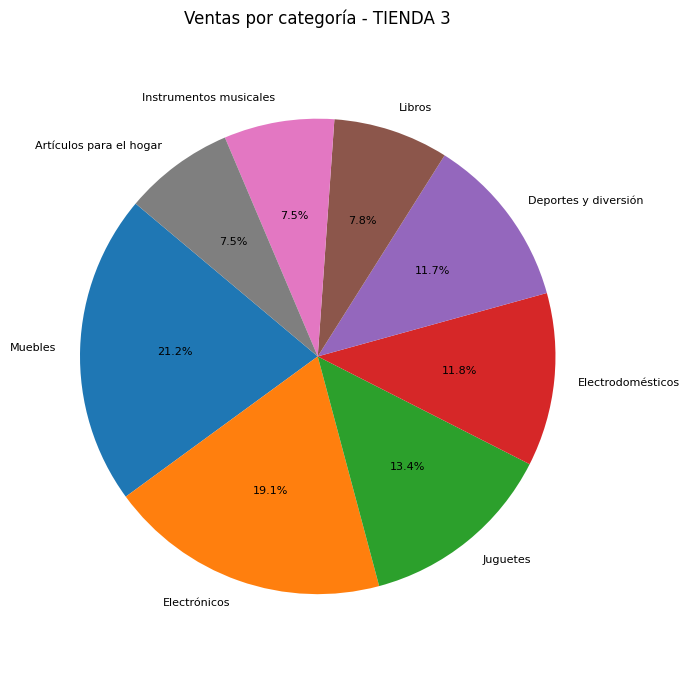


 VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - TIENDA 4
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64


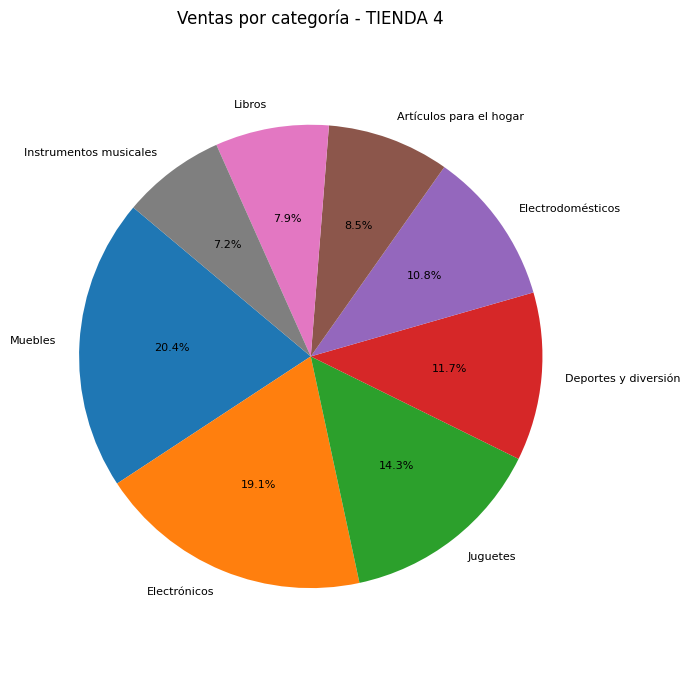

In [56]:
import matplotlib.pyplot as plt

# Agrupar en listas para procesarlas fácilmente
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Diccionario para guardar los resultados
ventas_por_categoria = {}

# Calcular cantidad de productos vendidos por categoría
for i, tienda in enumerate(tiendas):
    cantidad_vendida = tienda['Categoría del Producto'].value_counts()
    ventas_por_categoria[nombres_tiendas[i]] = cantidad_vendida

# Mostrar resultados y graficar
for tienda_nombre, ventas in ventas_por_categoria.items():
    print("\n" + "="*60)
    print(f" VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - {tienda_nombre}")
    print("="*60)
    print(ventas)

    # Gráfica de pastel
    plt.figure(figsize=(7, 7))
    plt.pie(ventas.values,
            labels=ventas.index,
            autopct='%1.1f%%',
            startangle=140,
            textprops={'fontsize': 8})
    plt.title(f'Ventas por categoría - {tienda_nombre}', fontsize=12)
    plt.axis('equal')  # Asegura que el pastel sea circular
    plt.tight_layout()
    plt.show()




# 3. Calificación promedio de la tienda


CALIFICACION PROMEDIO EN CADA TIENDA

TIENDA 1: 

	3.98 

TIENDA 2: 

	4.04 

TIENDA 3: 

	4.05 

TIENDA 4: 

	4.0 



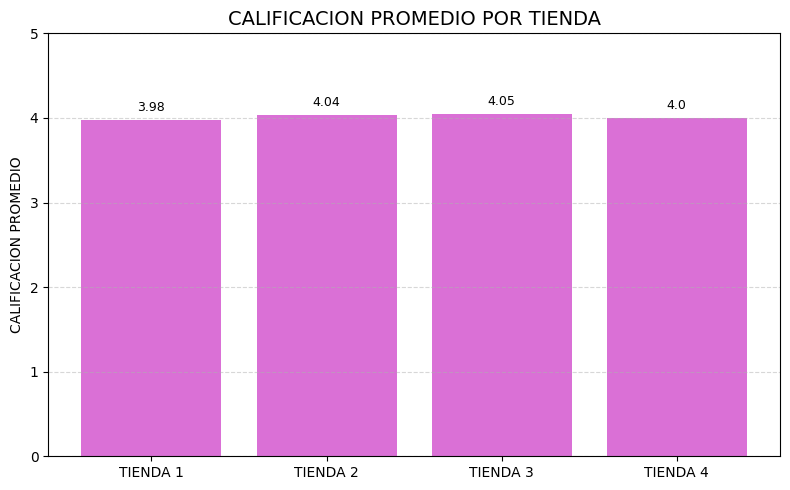

In [70]:
import matplotlib.pyplot as plt

# Agrupamos las tiendas en una lista
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Diccionario para almacenar las calificaciones promedio
calificaciones_promedio = {}

# Calcular promedio de calificación por tienda
for i, tienda in enumerate(tiendas):
    promedio = tienda['Calificación'].mean()
    calificaciones_promedio[nombres_tiendas[i]] = round(promedio, 2)

# Mostrar resultados
print("CALIFICACION PROMEDIO EN CADA TIENDA\n")
for tienda, calificacion in calificaciones_promedio.items():
    print(f"{tienda}: \n\n\t{calificacion} \n")


# Gráfica de barras
plt.figure(figsize=(8, 5))
plt.bar(calificaciones_promedio.keys(),
        calificaciones_promedio.values(),
        color='orchid')

plt.title('CALIFICACION PROMEDIO POR TIENDA', fontsize=14)
plt.ylabel('CALIFICACION PROMEDIO', fontsize=10)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar etiquetas de valor sobre cada barra
for i, valor in enumerate(calificaciones_promedio.values()):
    plt.text(i, valor + 0.1, str(valor), ha='center', fontsize=9)

plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

--- TIENDA 1 ---
 Producto más vendido: 'Microondas' con 60 ventas.
 Producto menos vendido: 'Auriculares con micrófono' con 33 ventas.

--- TIENDA 2 ---
 Producto más vendido: 'Iniciando en programación' con 65 ventas.
 Producto menos vendido: 'Juego de mesa' con 32 ventas.

--- TIENDA 3 ---
 Producto más vendido: 'Kit de bancas' con 57 ventas.
 Producto menos vendido: 'Bloques de construcción' con 35 ventas.

--- TIENDA 4 ---
 Producto más vendido: 'Cama box' con 62 ventas.
 Producto menos vendido: 'Guitarra eléctrica' con 33 ventas.



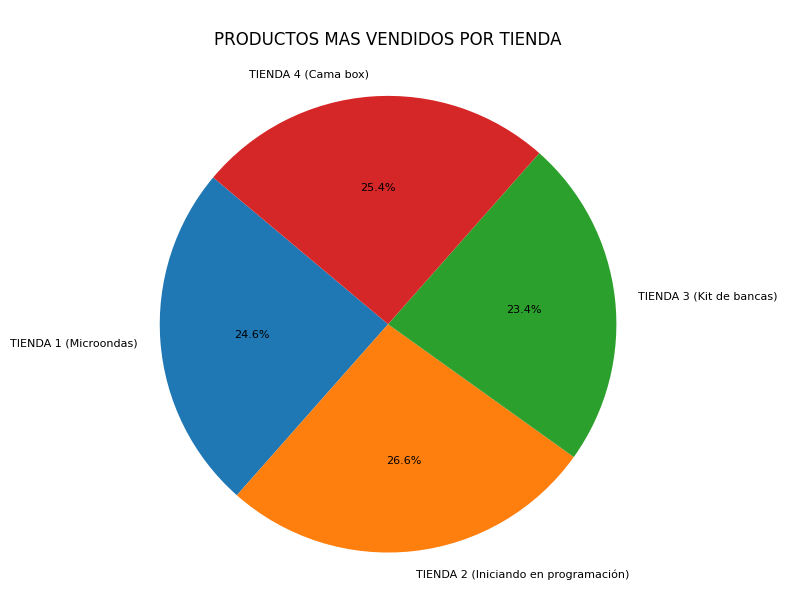

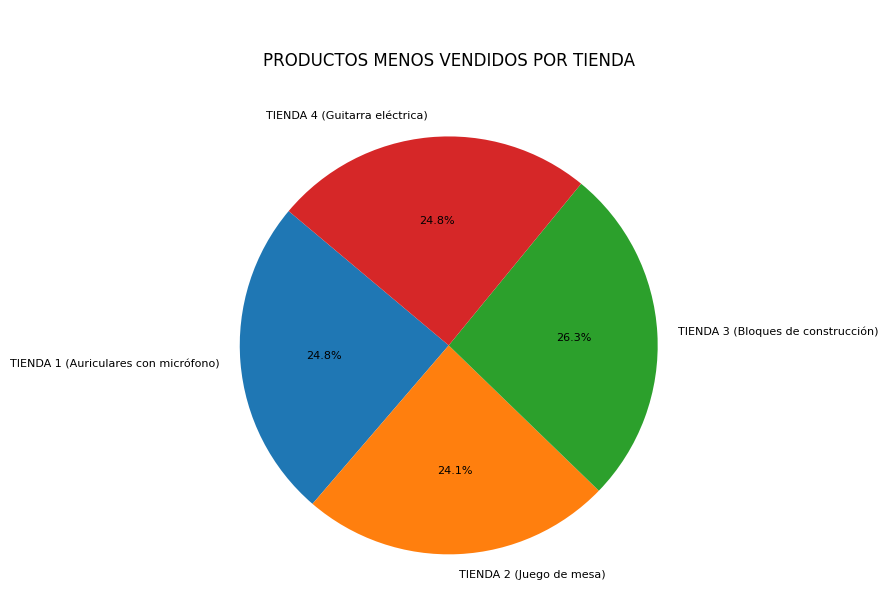

In [67]:
import matplotlib.pyplot as plt

# Lista con los DataFrames y nombres de las tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Listas para almacenar los resultados
mas_vendidos = []
menos_vendidos = []

# Identificar productos destacados
for i, tienda in enumerate(tiendas):
    ventas_producto = tienda['Producto'].value_counts()

    producto_mas_vendido = ventas_producto.idxmax()
    cantidad_mas_vendido = ventas_producto.max()

    producto_menos_vendido = ventas_producto.idxmin()
    cantidad_menos_vendido = ventas_producto.min()

    mas_vendidos.append((nombres_tiendas[i], producto_mas_vendido, cantidad_mas_vendido))
    menos_vendidos.append((nombres_tiendas[i], producto_menos_vendido, cantidad_menos_vendido))

    # Mostrar resultados
    print(f"--- {nombres_tiendas[i]} ---")
    print(f" Producto más vendido: '{producto_mas_vendido}' con {cantidad_mas_vendido} ventas.")
    print(f" Producto menos vendido: '{producto_menos_vendido}' con {cantidad_menos_vendido} ventas.\n")



# -----------------------------
# GRÁFICAS DE PASTEL POR TIPO
# -----------------------------

# Gráfica de pastel: Productos más vendidos
labels_mas = [f"{tienda} ({producto})" for tienda, producto, _ in mas_vendidos]
cantidades_mas = [x[2] for x in mas_vendidos]

plt.figure(figsize=(8, 6))
plt.pie(cantidades_mas, labels=labels_mas, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('\nPRODUCTOS MAS VENDIDOS POR TIENDA\n', fontsize=12)
plt.axis('equal')  # Círculo perfecto
plt.tight_layout()
plt.show()

# Gráfica de pastel: Productos menos vendidos
labels_menos = [f"{tienda} ({producto})" for tienda, producto, _ in menos_vendidos]
cantidades_menos = [x[2] for x in menos_vendidos]

plt.figure(figsize=(8, 6))
plt.pie(cantidades_menos, labels=labels_menos, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('\n\nPRODUCTOS MENOS VENDIDOS POR TIENDA\n\n', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [22]:
# Lista con los DataFrames y nombres de las tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Calcular costo de envío promedio por tienda
for i, tienda in enumerate(tiendas):
    if 'Costo de envío' in tienda.columns:
        promedio_envio = tienda['Costo de envío'].mean()
        print(f"\tCosto de envío promedio en {nombres_tiendas[i]}:\n\n\t\t\t\t\t${promedio_envio:.2f}\n")
    else:
        print(f"{nombres_tiendas[i]} no tiene columna 'CostoEnvio'")


	Costo de envío promedio en TIENDA 1:

					$26018.61

	Costo de envío promedio en TIENDA 2:

					$25216.24

	Costo de envío promedio en TIENDA 3:

					$24805.68

	Costo de envío promedio en TIENDA 4:

					$23459.46



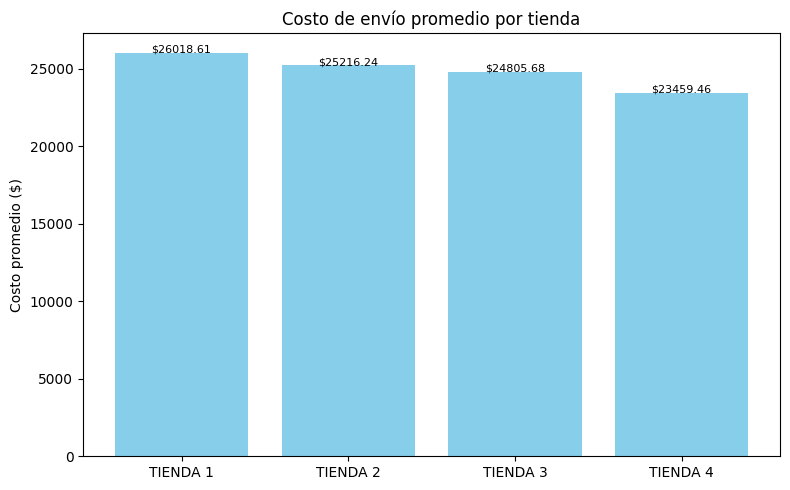

In [13]:
import matplotlib.pyplot as plt

# Almacenar promedios
promedios_envio = []

for tienda in tiendas:
    if 'Costo de envío' in tienda.columns:
        promedio = tienda['Costo de envío'].mean()
    else:
        promedio = 0
    promedios_envio.append(promedio)

# Gráfica
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, promedios_envio, color='skyblue')
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo promedio ($)')
for i in range(len(promedios_envio)):
    plt.text(i, promedios_envio[i] + 0.5, f"${promedios_envio[i]:.2f}", ha='center', fontsize=8)
plt.tight_layout()
plt.show()
